In [87]:
"""importing modules"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [88]:
"""load the files"""
df=pd.read_csv("E:\datas\CCT.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [89]:
df.shape

(440833, 12)

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [91]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [92]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [93]:
df.fillna(0, inplace=True)  


In [94]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

   Churn   Total
0    1.0  249999
1    0.0  190834


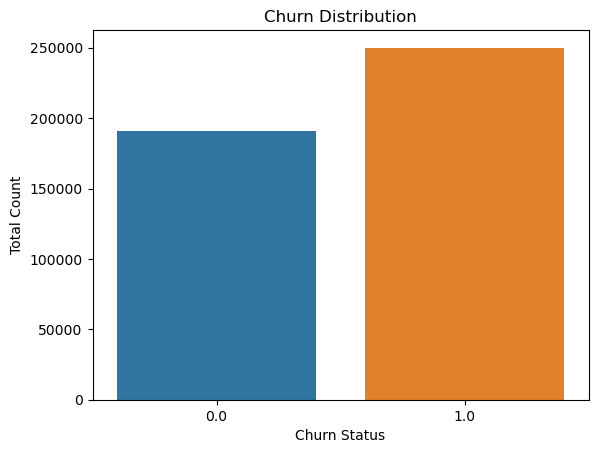

In [95]:
"""Ploting churn"""
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Total']
print(churn_counts)
sns.barplot(x='Churn', y='Total', data=churn_counts)
plt.xlabel('Churn Status')
plt.ylabel('Total Count')
plt.title('Churn Distribution')
plt.show()


Gender
Male      250252
Female    190580
0              1
Name: count, dtype: int64


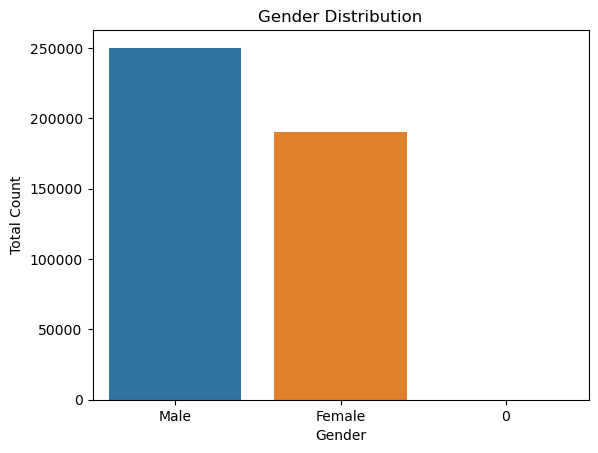

In [96]:
"""Ploting gender"""
gender_counts = df['Gender'].value_counts()
print(gender_counts)

gender_counts_df = gender_counts.reset_index()

gender_counts_df.columns = ['Gender', 'Total']
sns.barplot(x='Gender', y='Total', data=gender_counts_df)
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Gender Distribution')
plt.show()


Subscription Type
Standard    149128
Premium     148678
Basic       143026
0                1
Name: count, dtype: int64


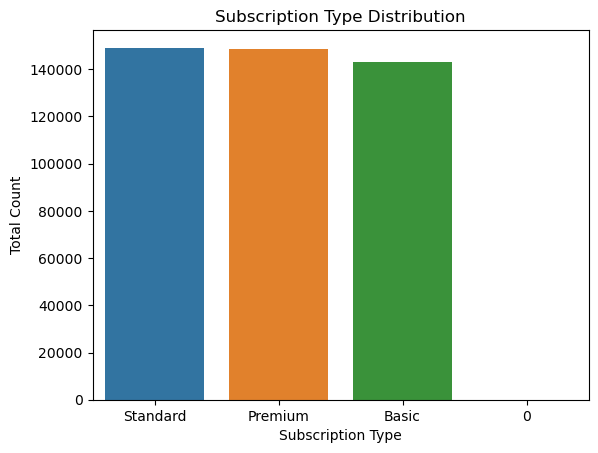

In [97]:
"""Ploting Subscription type"""
type_counts = df['Subscription Type'].value_counts()
print(type_counts)
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['Subscription Type', 'Total']
sns.barplot(x='Subscription Type', y='Total', data=type_counts_df)
plt.xlabel('Subscription Type')
plt.ylabel('Total Count')
plt.title('Subscription Type Distribution')
plt.show()


Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
0                 1
Name: count, dtype: int64


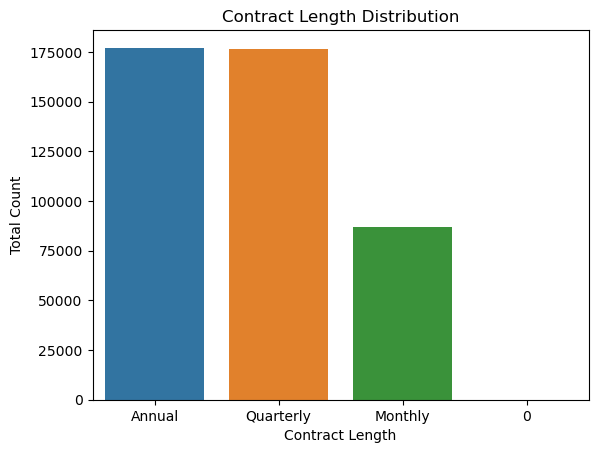

In [98]:
"""ploting contracts"""
length_counts = df['Contract Length'].value_counts()
print(length_counts)
length_counts_df = length_counts.reset_index()
length_counts_df.columns = ['Contract Length', 'Total']
sns.barplot(x='Contract Length', y='Total', data=length_counts_df)
plt.xlabel('Contract Length')
plt.ylabel('Total Count')
plt.title('Contract Length Distribution')
plt.show()


Usage Frequency
11.0    15311
29.0    15284
20.0    15258
25.0    15237
30.0    15232
21.0    15205
19.0    15204
12.0    15179
26.0    15134
15.0    15129
27.0    15121
14.0    15094
10.0    15090
23.0    15072
17.0    15058
24.0    15038
13.0    15015
28.0    15012
22.0    15005
16.0    14949
18.0    14871
3.0     13843
1.0     13797
9.0     13770
6.0     13746
8.0     13725
5.0     13716
2.0     13633
7.0     13555
4.0     13549
0.0         1
Name: count, dtype: int64


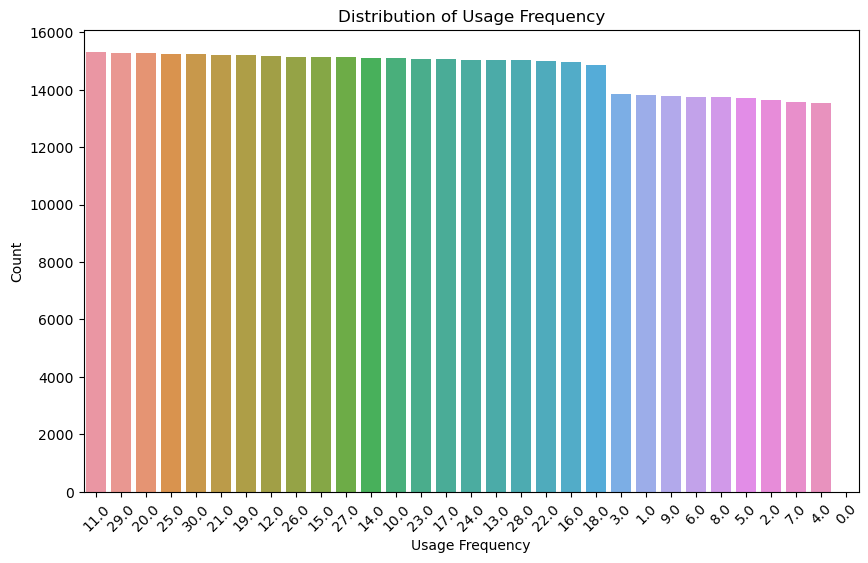

In [99]:
"""Distribution of Usage Frequency"""
usage_frequency_counts = df['Usage Frequency'].value_counts()
print(usage_frequency_counts)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Usage Frequency', order=df['Usage Frequency'].value_counts().index)
plt.title('Distribution of Usage Frequency')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


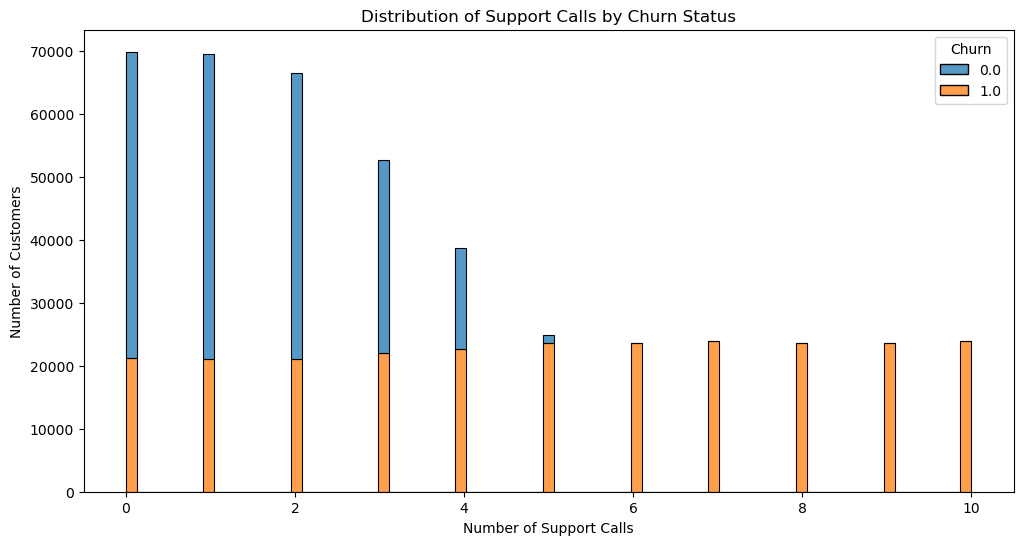

In [100]:
"""Ploting Distribution of Support Calls by Churn Status"""
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Support Calls', hue='Churn', multiple='stack')
plt.title('Distribution of Support Calls by Churn Status')
plt.xlabel('Number of Support Calls')
plt.ylabel('Number of Customers')
plt.show()



In [101]:
df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()
churn_correlation = correlation_matrix['Churn']
print(churn_correlation)


CustomerID                   -0.839357
Age                           0.218399
Tenure                       -0.051914
Usage Frequency              -0.046096
Support Calls                 0.574268
Payment Delay                 0.312132
Total Spend                  -0.429344
Last Interaction              0.149620
Churn                         1.000000
Gender_Female                 0.175397
Gender_Male                  -0.175391
Subscription Type_Basic       0.020528
Subscription Type_Premium    -0.011070
Subscription Type_Standard   -0.009245
Contract Length_Annual       -0.175962
Contract Length_Monthly       0.433553
Contract Length_Quarterly    -0.176242
Name: Churn, dtype: float64


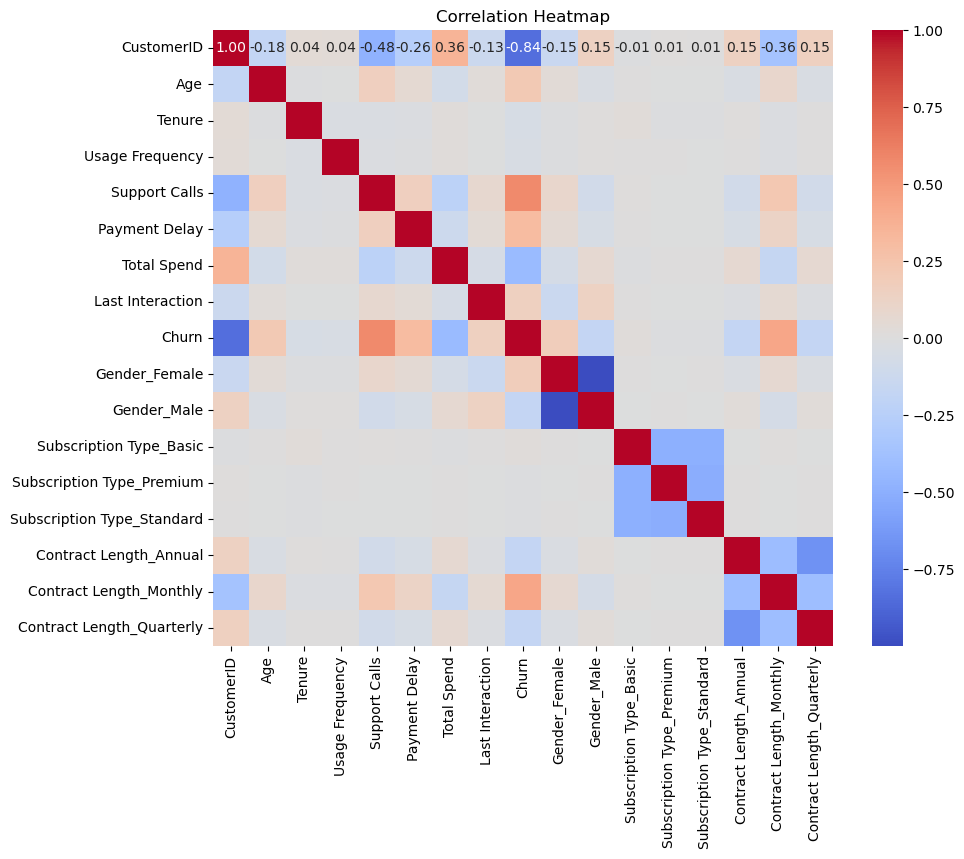

In [115]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


In [103]:
"""Preparing Data for Machine Learning: Feature Encoding, Splitting, and Scaling"""
X = pd.get_dummies(df.drop(columns=['Churn', 'CustomerID']), drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [104]:
"""Training a Logistic Regression Model with Balanced Class Weights"""
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=200)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

In [105]:
"""Predicting Churn Outcomes Using the Logistic Regression Model"""
y_pred = log_reg.predict(X_test)
print(y_pred)


[1. 1. 0. ... 0. 1. 1.]


In [106]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.90
Precision: 0.94
Recall: 0.87
ROC-AUC: 0.90


Confusion Matrix:
[[35465  2678]
 [ 6350 43674]]


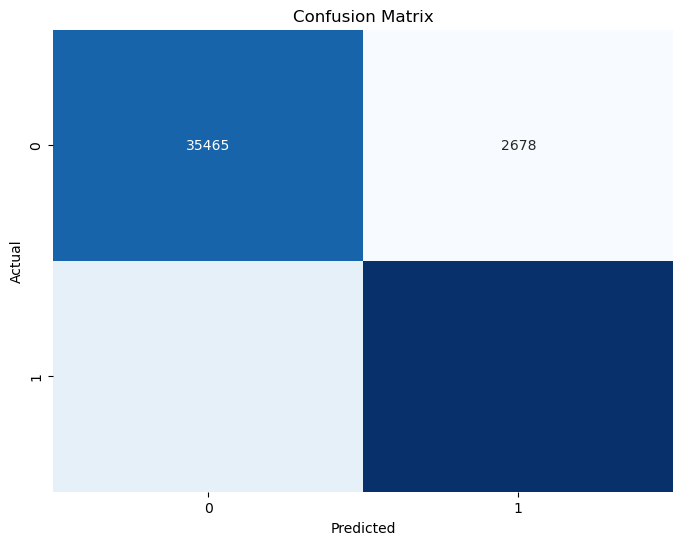

In [107]:
"""COnfusion matrix:"""
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [108]:
"""Analyzing Feature Importance: Logistic Regression Coefficients"""
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

coefficients['AbsCoefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

print(coefficients)


                       Feature  Coefficient  AbsCoefficient
13     Contract Length_Monthly     3.898022        3.898022
3                Support Calls     2.339804        2.339804
5                  Total Spend    -1.483418        1.483418
12      Contract Length_Annual    -1.182627        1.182627
14   Contract Length_Quarterly    -1.177977        1.177977
4                Payment Delay     0.939198        0.939198
7                Gender_Female     0.683097        0.683097
6             Last Interaction     0.524796        0.524796
0                          Age     0.427821        0.427821
9      Subscription Type_Basic     0.313746        0.313746
11  Subscription Type_Standard     0.261568        0.261568
10   Subscription Type_Premium     0.260861        0.260861
1                       Tenure    -0.132776        0.132776
2              Usage Frequency    -0.121848        0.121848
8                  Gender_Male     0.112171        0.112171


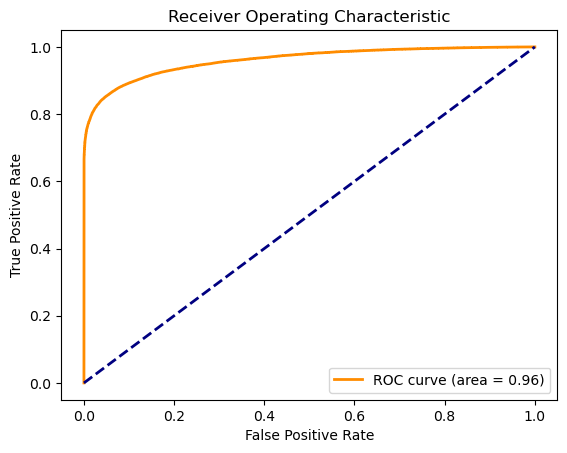

In [109]:
y_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


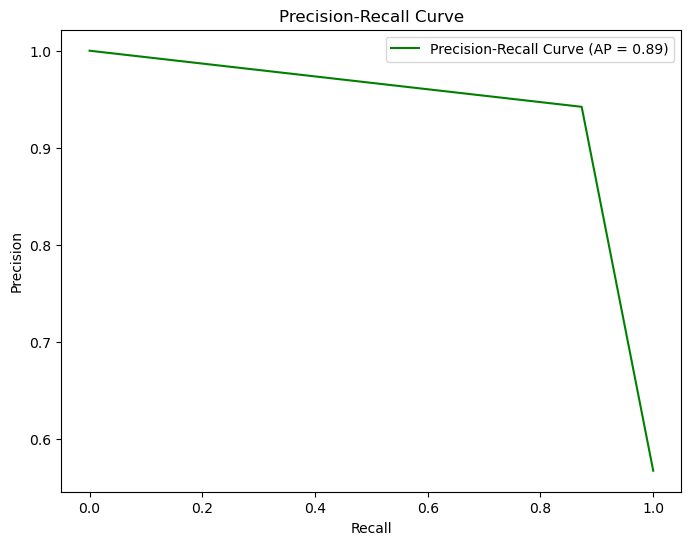

In [110]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()
